In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.preprocessing 

%matplotlib inline

# Lectura de datos

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
data[:2]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


# Selección de target y predictores

In [4]:
print(data.keys())

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


In [5]:
Y = np.array(data['Price'])
columns = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
          'Fuel.tank.capacity', 'Length', 'Width', 'Turn.circle', 'Weight']
X = np.array(data[columns])

In [6]:
print(np.shape(Y), np.shape(X))

(93,) (93, 11)


# Un primer ajuste lineal con mínimos cuadrados

[-0.09749227  0.01704899  1.39323074  0.14090089 -0.00192575  0.00278482
  0.15973715  0.17275455 -1.48506513 -0.4955841   0.00570524]
0.7203097553950031


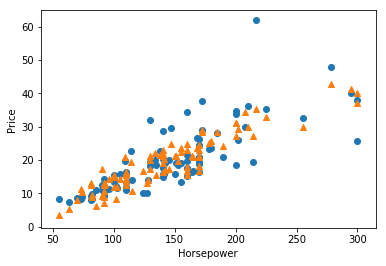

In [7]:
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X, Y)
plt.scatter(X[:,3], Y)
plt.scatter(X[:,3], regresion.predict(X), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(regresion.coef_)
print(regresion.score(X, Y))

# Selección de los predictores menos importantes a partir de los coeficientes 

In [8]:
ii = np.argsort(np.abs(regresion.coef_))
for i in ii:
    print(columns[i], regresion.coef_[i])

RPM -0.0019257504559044474
Rev.per.mile 0.0027848177463335967
Weight 0.005705241174039332
MPG.highway 0.01704899085195439
MPG.city -0.09749226980239156
Horsepower 0.14090088973596676
Fuel.tank.capacity 0.15973714632712563
Length 0.17275455070394025
Turn.circle -0.4955841047125226
EngineSize 1.3932307353328608
Width -1.485065134393946


# Renormalización de los datos para que todas las variables sean comparables

In [9]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

[-0.54493458  0.09041051  1.43749468  7.3398184  -1.14296137  1.37522633
  0.52101334  2.50902869 -5.58178722 -1.5887873   3.34735886]
0.7203097553950033


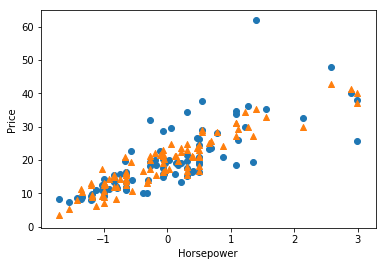

In [10]:
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(X_scaled, Y)
plt.scatter(X_scaled[:,3], Y)
plt.scatter(X_scaled[:,3], regresion.predict(X_scaled), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(regresion.coef_)
print(regresion.score(X_scaled, Y))

In [11]:
ii = np.argsort(np.abs(regresion.coef_))
for i in ii:
    print(columns[i], regresion.coef_[i])

MPG.highway 0.09041051486063534
Fuel.tank.capacity 0.5210133395919417
MPG.city -0.5449345836365029
RPM -1.1429613658645192
Rev.per.mile 1.3752263266684004
EngineSize 1.4374946765397802
Turn.circle -1.5887872965325665
Length 2.50902869032578
Weight 3.3473588588940046
Width -5.5817872238306405
Horsepower 7.339818399275947


# Regularización para reducir el número de predictores relevantes

[-0.         -0.36030952  0.          6.2774144   0.          0.
  0.05270653  0.34022431 -0.45301057 -0.13254975  0.9659147 ]
0.6419177402686429


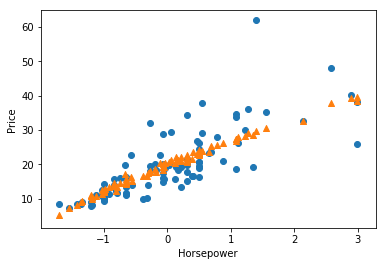

In [12]:
lasso = sklearn.linear_model.Lasso(alpha=0.5)
lasso.fit(X_scaled, Y)
plt.scatter(X_scaled[:,3], Y)
plt.scatter(X_scaled[:,3], lasso.predict(X_scaled), marker='^')
plt.xlabel(columns[3])
plt.ylabel('Price')
print(lasso.coef_)
print(lasso.score(X_scaled, Y))

In [13]:
ii = np.argsort(np.abs(lasso.coef_))
for i in ii:
    print(columns[i], lasso.coef_[i])

MPG.city -0.0
EngineSize 0.0
RPM 0.0
Rev.per.mile 0.0
Fuel.tank.capacity 0.052706534653787024
Turn.circle -0.13254974891711735
Length 0.3402243137262089
MPG.highway -0.36030952142395783
Width -0.45301056977418214
Weight 0.965914701013101
Horsepower 6.2774144013523685
